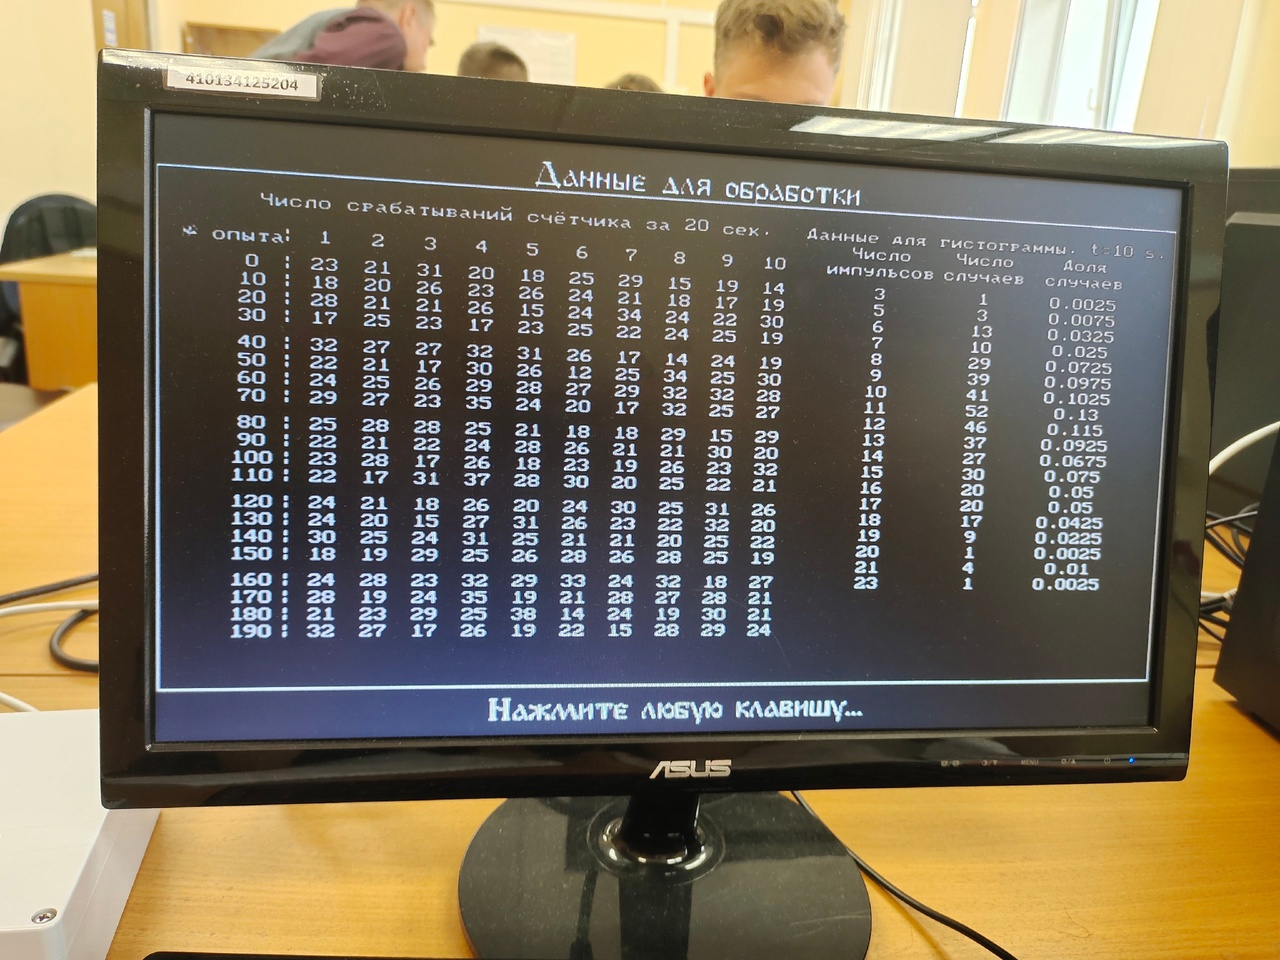

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [226]:
data = [23, 21, 31, 20, 18, 25, 29, 15, 19, 14,
        18, 20, 26, 23, 26, 24, 21, 18, 17, 19,
        28, 21, 21, 26, 15, 24, 34, 24, 22, 30, 
        17, 25, 23, 17, 23, 25, 22, 24, 25, 19,
        
        32, 27, 27, 32, 31, 26, 17, 14, 24, 19, 
        22, 21, 17, 30, 26, 12, 25, 34, 25, 30,
        24, 25, 26, 29, 28, 27, 29, 32, 32, 28, 
        29, 27, 23, 35, 24, 20, 17, 32, 25, 27,
        
        25, 28, 28, 25, 21, 18, 18, 29, 15, 29, 
        22, 21, 22, 24, 28, 26, 21, 21, 30, 20, 
        23, 28, 17, 26, 18, 23, 19, 26, 23, 32, 
        22, 17, 31, 37, 28, 30, 20, 25, 22, 21, 
        
        24, 21, 18, 26, 20, 24, 30, 25, 31, 26, 
        24, 20, 15, 27, 31, 26, 23, 22, 32, 20, 
        30, 25, 24, 31, 25, 21, 21, 20, 25, 22, 
        18, 19, 29, 25, 26, 28, 26, 28, 25, 19,
        
        24, 28, 23, 32, 29, 33, 24, 32, 18, 27, 
        28, 19, 24, 35, 19, 21, 28, 27, 28, 21, 
        21, 23, 29, 25, 38, 14, 24, 19, 30, 21, 
        32, 27, 17, 26, 19, 22, 15, 28, 29, 24]

## Histogram for 20 seconds 

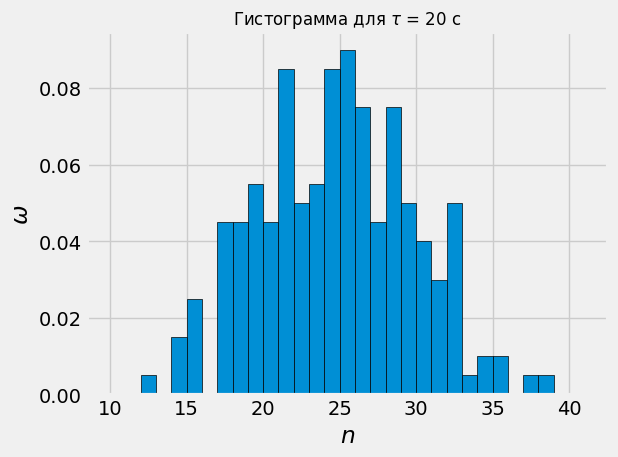

In [227]:
n = 200 ## for 20 sec 200 points

bins = [x for x in range(10, 42)]
fig, ax = plt.subplots()
ax.hist(data, bins = bins, edgecolor = 'black', density = True)
plt.title(r'Гистограмма для $\tau$ = 20 с', size = 12)

plt.xlabel(r'$n$')
plt.ylabel(r'$\omega$')
# ax.xaxis.set_major_locator(plt.IndexLocator(base = 5, offset = 0))
plt.tight_layout()

plt.show()

## Histogram for 40 seconds


In [228]:
data_2 = [data[i] + data[i+1] for i in range(0, n, 2)]
n2 = 100

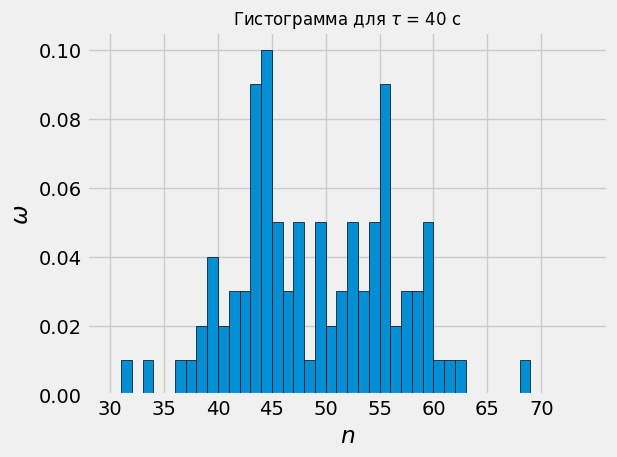

In [229]:

bins = [x for x in range(30, 75)]
fig, ax = plt.subplots()
ax.hist(data_2, bins = bins, edgecolor = 'black', density = True)
plt.title(r'Гистограмма для $\tau$ = 40 с', size = 12)

plt.xlabel(r'$n$')
plt.ylabel(r'$\omega$')
ax.xaxis.set_major_locator(plt.IndexLocator(base = 5, offset = 0))
plt.tight_layout()

plt.show()

### table 1


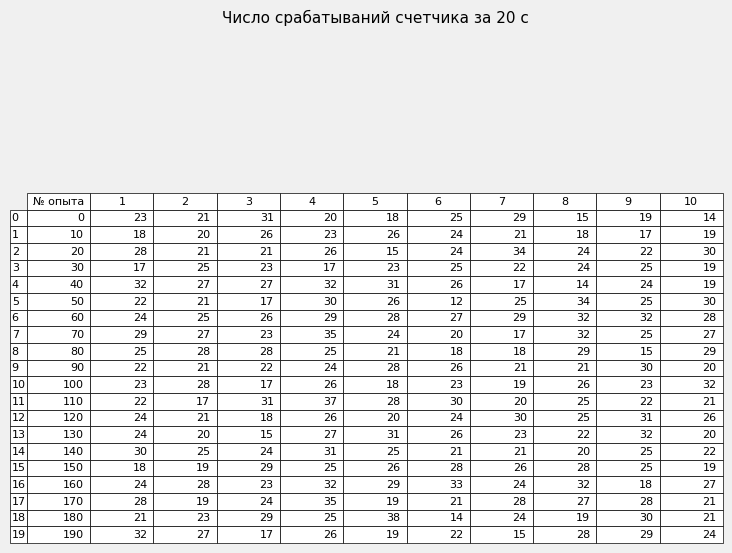

In [230]:

d1 = {(j+1): [data[i*10 + j] for i in range(n//10)] for j in range(n//20)}

dict1 = {'№ опыта':[i*10 for i in range(20)]}
dict1.update(d1)

# dict
table1 = pd.DataFrame(dict1)

fig = plt.figure(figsize = (8, 2))
ax = fig.add_subplot(111)

ax.table(cellText = table1.values,
          rowLabels = table1.index,
          colLabels = table1.columns
         )
ax.set_title("Число срабатываний счетчика за 20 с", size = 11)


ax.axis("off");









### table 2

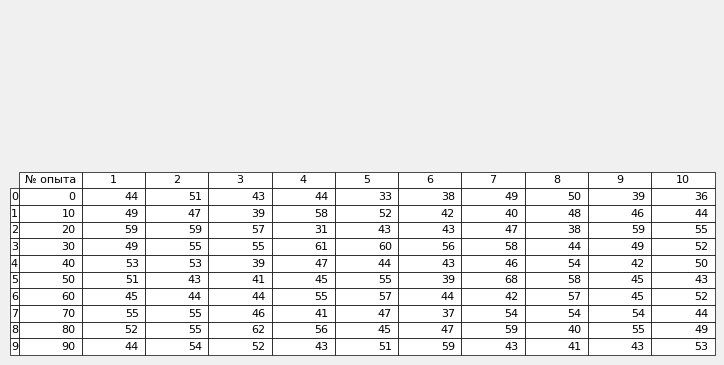

In [231]:

d2 = {(j+1): [data_2[i*10 + j] for i in range(n2//10)] for j in range(n2//10)}

dict2 = {'№ опыта':[i*10 for i in range(n2//10)]}
dict2.update(d2)

# dict
table2 = pd.DataFrame(dict2)


fig = plt.figure(figsize = (8, 2))
ax = fig.add_subplot(111)

ax.table(cellText = table2.values,
          rowLabels = table2.index,
          colLabels = table2.columns
         )
# ax.set_title("Число срабатываний счетчика за 40 с", size = 11)


ax.axis("off");

## Avarage functions


In [232]:
avarage1 = sum(data)/n
avarage2 = sum(data_2)/n2

In [233]:
def quadratic_avarage(simple_data, avarage): ## стандартная ошибка отдельного измерения сигма отдельная
    s = 0
    size = len(simple_data)
    for i in range(size):
        s+=(simple_data[i] - avarage)**2
    return (s/size)**0.5
    

In [234]:
def quadratic_avarage2(simple_data, avarage): ## стандартная ошибка отколонения среднего n от n0
    s = 0
    size = len(simple_data)
    for i in range(size):
        s+=(simple_data[i] - avarage)**2
    return (s**0.5)/size

In [243]:
print('$$\overarc{n}$$ = ', avarage1)
print(r'$$\sigma$$ = ', quadratic_avarage(data, avarage1))
print(r'$\sigma$ = ', avarage1**0.5)
print("относительная полуширина = ", 100*quadratic_avarage(data, avarage1)/avarage1, "%") 
print("standart ошибка nср от n0 = ", quadratic_avarage2(data, avarage1))
print("относительная ошибка = ", 100*quadratic_avarage2(data, avarage1)/avarage1, "%")

$$\overarc{n}$$ =  24.28
$$\sigma$$ =  4.990150298337716
$\sigma$ =  4.927473997901968
относительная полуширина =  20.55251358458697 %
standart ошибка nср от n0 =  0.35285691150946724
относительная ошибка =  1.4532821726090084 %


In [245]:
print('$\overarc{n}$ = ', avarage2)
print(r'$\sigma$ = ', quadratic_avarage(data_2, avarage2))
print(r'$\sigma$ = ', avarage2**0.5)
print("относительная полуширина = ", 100*quadratic_avarage(data_2, avarage2)/avarage2, "%") 
print("standart ошибка nср от n0 = ", quadratic_avarage2(data_2, avarage2))
print("относительная ошибка = ", 100*quadratic_avarage2(data_2, avarage2)/avarage2, "%")

$\overarc{n}$ =  48.56
$\sigma$ =  7.143276559114872
$\sigma$ =  6.968500556073739
относительная полуширина =  14.710207082197018 %
standart ошибка nср от n0 =  0.7143276559114873
относительная ошибка =  1.4710207082197018 %


## доля случаев для 20 с


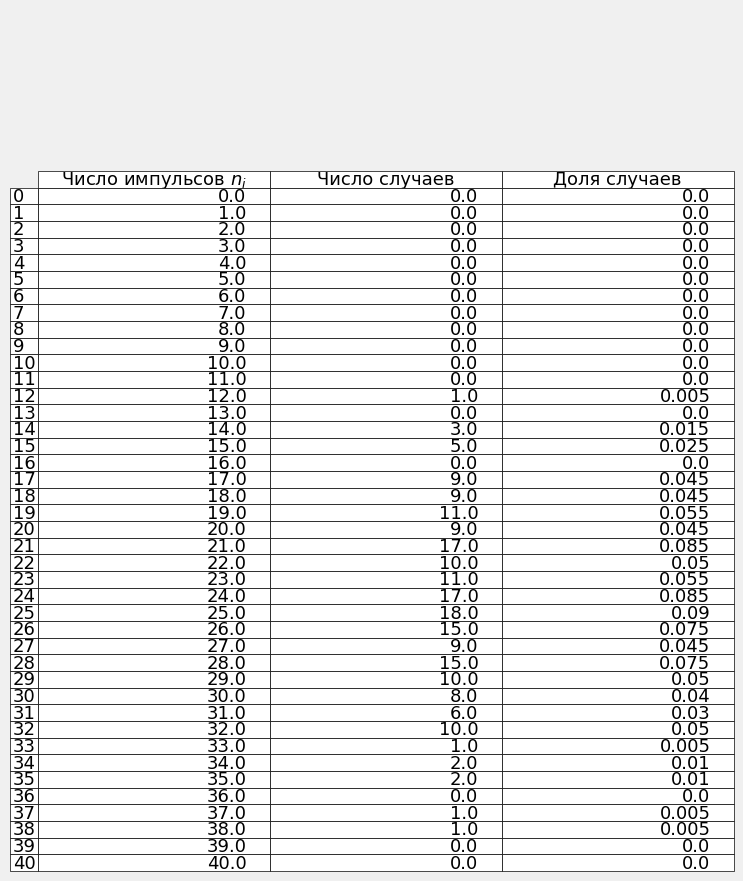

In [237]:
column1 = {'Число импульсов $n_i$': [x for x in range(41)]}
a = [0]*42
for x in range(n):
    a[data[x]]+=1
    # print(data[x], a[data[x]])
    
            
column2 = {'Число случаев': [a[i] for i in range(41)]}

column3 = {'Доля случаев': [round(a[i]/n, 3) for i in range(41)]}

column1.update(column2)
column1.update(column3)

table11 = pd.DataFrame(column1)

fig = plt.figure(figsize = (8, 2))
ax = fig.add_subplot(111)

ax.table(cellText = table11.values,
          rowLabels = table11.index,
          colLabels = table11.columns
         )
# ax.set_title("Число срабатываний счетчика за 20 с", size = 11)


ax.axis("off");


In [238]:
counter11 = 0
counter12 = 0
quadratic_error1 = round(quadratic_avarage(data, avarage1), 5)
for i in range(n):
    if round(abs(data[i] - avarage1), 5) <= quadratic_error1:
        counter11+=1
    if round(abs(data[i] - avarage1), 5) <= 2*quadratic_error1:
        counter12+=1
print(counter11, counter12)


counter21 = 0
counter22 = 0
quadratic_error2 = round(quadratic_avarage(data_2, avarage2), 5)
for i in range(n2):
    if round(abs(data_2[i] - avarage2), 5) <= quadratic_error2:
        counter21+=1
    if round(abs(data_2[i] - avarage2), 5) <= 2*quadratic_error2:
        counter22+=1
print(counter21, counter22)


131 192
68 97


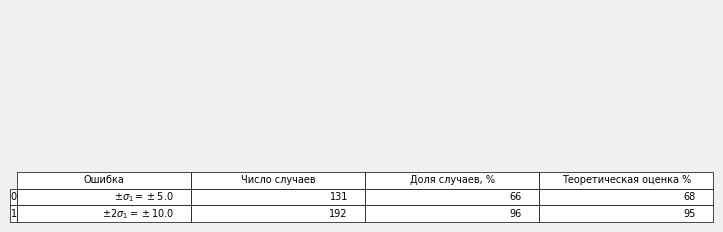

In [239]:
column1 = {'Ошибка': ["$\pm\sigma_1 = \pm$" + str(round(quadratic_error1, 1)), "$\pm 2\sigma_1 = \pm$" + str(2*round(quadratic_error1, 1))] }            
column2 = {'Число случаев': [counter11, counter12]}

column3 = {'Доля случаев, %': [int(round(100*counter11/n, 0)), int(round(100*counter12/n, 0))]}
column4 = {'Теоретическая оценка %': [68, 95]}

column1.update(column2)
column1.update(column3)
column1.update(column4)

table11 = pd.DataFrame(column1)

fig = plt.figure(figsize = (8, 2))
ax = fig.add_subplot(111)

ax.table(cellText = table11.values,
          rowLabels = table11.index,
          colLabels = table11.columns
         )
# ax.set_title("Число срабатываний счетчика за 20 с", size = 11)


ax.axis("off");

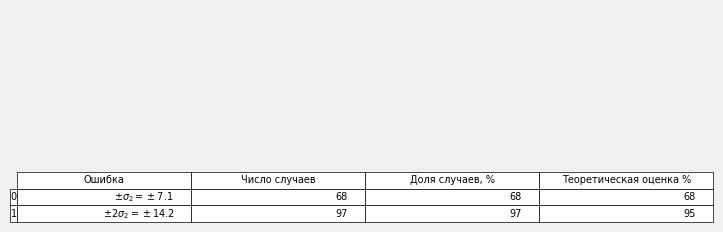

In [241]:
column1 = {'Ошибка': ["$\pm\sigma_2 = \pm$" + str(round(quadratic_error2, 1)), "$\pm 2\sigma_2 = \pm$" + str(2*round(quadratic_error2, 1))] }            
column2 = {'Число случаев': [counter21, counter22]}

column3 = {'Доля случаев, %': [int(round(100*counter21/n2, 0)), int(round(100*counter22/n2, 0))]}
column4 = {'Теоретическая оценка %': [68, 95]}

column1.update(column2)
column1.update(column3)
column1.update(column4)

table11 = pd.DataFrame(column1)

fig = plt.figure(figsize = (8, 2))
ax = fig.add_subplot(111)

ax.table(cellText = table11.values,
          rowLabels = table11.index,
          colLabels = table11.columns
         )
# ax.set_title("Число срабатываний счетчика за 20 с", size = 11)


ax.axis("off");

## доля случаев для 40 с

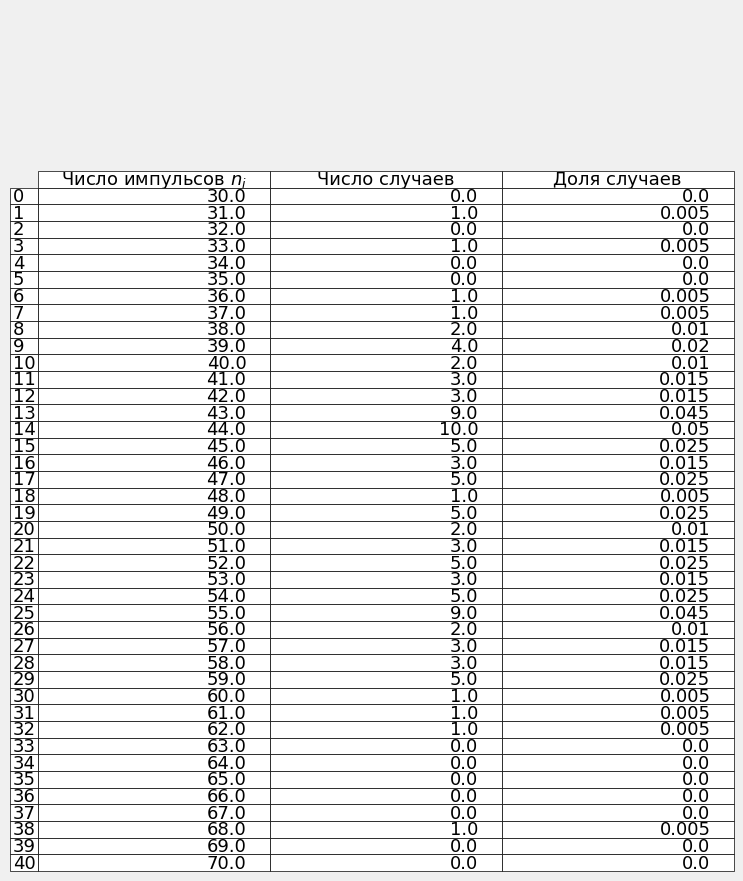

In [212]:
column1 = {'Число импульсов $n_i$': [x for x in range(30, 71)]}
a = [0]*72
for x in range(n2):
    a[data_2[x]]+=1
    # print(data[x], a[data[x]])
    
            
column2 = {'Число случаев': [a[i] for i in range(30, 71)]}

column3 = {'Доля случаев': [round(a[i]/n, 3) for i in range(30, 71)]}

column1.update(column2)
column1.update(column3)

table11 = pd.DataFrame(column1)

fig = plt.figure(figsize = (8, 2))
ax = fig.add_subplot(111)

ax.table(cellText = table11.values,
          rowLabels = table11.index,
          colLabels = table11.columns
         )
# ax.set_title("Число срабатываний счетчика за 20 с", size = 11)


ax.axis("off");